<a href="https://colab.research.google.com/github/kedemdor/metric-learning-talk/blob/main/Metric_learning_tutoriall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metric learning - code breakfast session

Good morning, and welcome to the code breakfast session. This notebook will guide you through the topic of metric learning, a sub-field of **supervised learning**, which aims to learn a meaningful quantifiable measurement for similarity ("metric" or "distance") in the supervised task domain.

Metric learning is a very useful field in computer vision, recommendation systems, 

The intuitiveness behind why metric learning is useful lies in distance-based algorithms (i.e. k-nearest neighbors or k-means). If you have a good measurement for similarity (or distance) - many problems in AI and machine learning become trivial.
* If you have a good way to find similarity in faces, you could build an excellent face verification model with a simple distance measurement with a threshold.
* If you have a good way to find similarity in music or movies that an individual likes, you can easily recommend this person the next content to consume by looking at the nearest neighbors (where similar items are closer together).
* In a similar manner, you could apply clustering on the similar entities which are semantically close to both learn about interesting aspects of the similar items, and to classify new items based on proximity (k-nearest neighbors).

Let's get started.

# Understanding distances

## Background 
Merriam Webster [defines of a metric](https://www.merriam-webster.com/dictionary/metric), which includes the mathematical definition - a function between two elements that results in a real number measurement (i.e. $d: \mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$) that satisfy the following conditions:

* **Coincidence**: $d(\vec{x}, \vec{y})=0 \iff \vec{x}=\vec{y}$, for every $\vec{x},\vec{y}\in \mathbb{R}^n$

* **Symmetry**: $d(\vec{x}, \vec{y})=d(\vec{y}, \vec{x})$, for every $\vec{x},\vec{y}\in \mathbb{R}^n$

* **Triangle inequality**: $d(\vec{x},\vec{z}) \le d(\vec{x},\vec{y}) + d(\vec{y},\vec{z})$, for every $\vec{x},\vec{y},\vec{z} \in \mathbb{R}^n$

* **Non-negativity**: $d(\vec{x},\vec{y}) \ge 0$, for every $x,y\in \mathbb{R}^n$

A couple of very well-known and intuitive distances are the **Euclidean** (or *L2*) distance and the **Manhattan** (or *L1* or taxi-driver) distance.
* **Manhattan distance**: $d(\vec{x},\vec{y}) = \sum_{i=1}^n|x_i-y_i|$

* **Euclidean distance**: $d(\vec{x},\vec{y}) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2} = \sqrt{(\vec{x}-\vec{y})^T(\vec{x}-\vec{y})}$


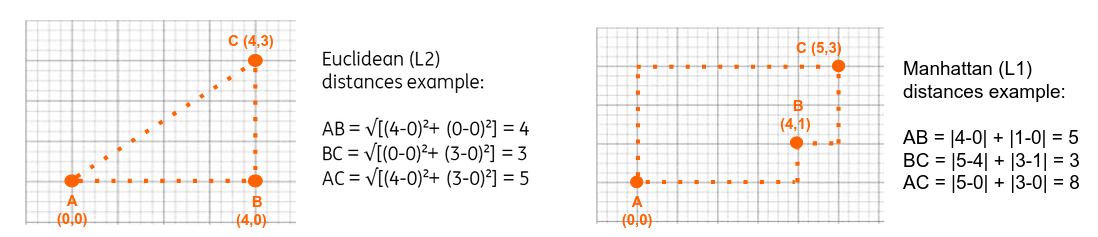

In scikit-learn, you can play around & evaluate some pairwise distance with some of these metrics in the namespace <code>sklearn.neighbors.DistanceMetric</code>.

In [ ]:
import numpy as np
from sklearn.neighbors import DistanceMetric

def calculate_triange_distances(a, b, c, metric_str: str, **metric_params):
  print(f"Triange [{metric_str} {metric_params}].\nPoints: A={a}, B={b}, C={c}")
  metric = DistanceMetric.get_metric(metric_str, **metric_params)
  print("Distances: " +
    ", ".join(
      [f"d(A,B)={float(metric.pairwise(np.array([a]),np.array([b]))):0.2f}",
       f"d(B,C)={float(metric.pairwise(np.array([b]),np.array([c]))):0.2f}",
       f"d(A,C)={float(metric.pairwise(np.array([a]),np.array([c]))):0.2f}\n"]))

calculate_triange_distances(metric_str="euclidean", a=(0,0), b=(4,0), c=(4,3))
calculate_triange_distances(metric_str="manhattan", a=(0,0), b=(4,1), c=(5,3))

Triange [euclidean {}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=5.00

Triange [manhattan {}].
Points: A=(0, 0), B=(4, 1), C=(5, 3)
Distances: d(A,B)=5.00, d(B,C)=3.00, d(A,C)=8.00



## Parameterized distances

The Euclidean and Manhattan distances are well known and simple distances, and there are many other distnaces which, depending on the domain (i.e. [$\chi^2$ distance](https://www.geeksforgeeks.org/chi-square-distance-in-python/) is useful histogram or image differences), could give a different, perhaps more fitting similarity estimation. These distances are also *non-parameterized* distances, meaning we didn't need to provide an additional parameter to evaluate the distance - only the elements.

There are other types of distances, *parameterized distances*, which require a parameter that adjusts the distance function.

Let's look at a simple parameterized distance, which generalizes both the Manhattan & Euclidean distance. It's called the **Minkowski distance**, and given a parameter $p\gt0$, the distance is defined as:

$d_p(\vec{x},\vec{y})=(\sum_{i=1}^n|x_i-y_i|^p)^{\frac{1}{p}}$

You can see that when $p=1$, the Minkowski distance becomes the Manhattan distance. And when $p=2$, the Minkowski distance become the Euclidean distance. But you could specify different values of $p$, and get different "unit of distance" (the set of points which are of a distance of 1 from the given point).

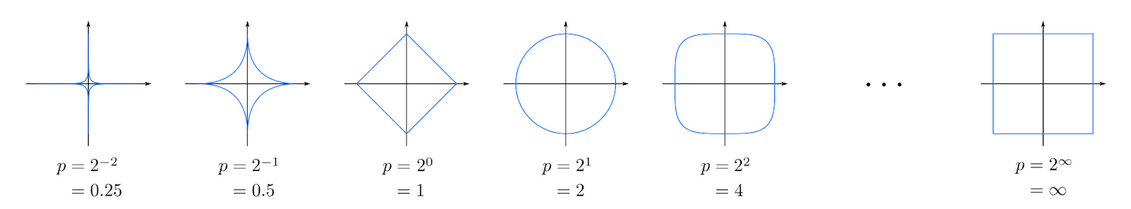

**Question 1**: The Minkowski distance is only a well defined metric when $p \ge 1$. Why is that?

<details><summary>Click to see the answer</summary>
<pre>For p<1 values, the Minkowski distance doesn't satisfy the triange inequality.</pre>
</details>

In [ ]:
calculate_triange_distances(metric_str="minkowski", a=(0,0), b=(4,0), c=(4,3), p=1)
calculate_triange_distances(metric_str="minkowski", a=(0,0), b=(4,0), c=(4,3), p=1.5)
calculate_triange_distances(metric_str="minkowski", a=(0,0), b=(4,0), c=(4,3), p=2)
calculate_triange_distances(metric_str="minkowski", a=(0,0), b=(4,0), c=(4,3), p=4)
calculate_triange_distances(metric_str="minkowski", a=(0,0), b=(4,0), c=(4,3), p=20)

Triange [minkowski {'p': 1}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=7.00

Triange [minkowski {'p': 1.5}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=5.58

Triange [minkowski {'p': 2}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=5.00

Triange [minkowski {'p': 4}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=4.28

Triange [minkowski {'p': 20}].
Points: A=(0, 0), B=(4, 0), C=(4, 3)
Distances: d(A,B)=4.00, d(B,C)=3.00, d(A,C)=4.00



There are lots of other parameterized distances with some very interesting ideas (see [Earth moving distance](https://en.wikipedia.org/wiki/Earth_mover%27s_distance) which is used in some developments measuring similarity in text & in vision), but the main advantage behind parameterized distances is that they gives us a chance to *learn what is the best set of parameters for a specific problem*, and in a sense, **learn the best metric for the problem** in a supervised manner.

Let's dive into another very useful parameterized distance - the **Mahalanobis distance**.

## Mahalanobis distance
The mahalanobis distance is one type of a parameterized distance. It was invented in 1936 by P.C. Mahalanobis as a method to evaluate a distance of a point from a mean of a distribution, which was generalized to learning the distance between two points across a data distribution.

From a mathematical definition, it resembles the evaluation of 

* Euclidean distance: $d(\vec{x},\vec{y}) = \sqrt{(\vec{x}-\vec{y})^T(\vec{x}-\vec{y})}$.

* Mahalanobis distance: $d_M(\vec{x},\vec{y}) = \sqrt{(\vec{x}-\vec{y})^TM(\vec{x}-\vec{y})}$.

As it was used mainly to evaluate a distance of a datapoint from a distribution (and in that, to find outliers with larger distance), the choice of $M$ matrix was suggested to be the inverse of the covariance matrix of the data.

**Question 2**: There's another very famous dimensionality reduction technique which uses the inverse of the covariance matrix. Which technique is it?

<details><summary>Click to see the answer</summary>
<pre>Principle Component Analysis (PCA) uses the inverse of the covariance matrix, decomposing it with singular value decomposition.</pre>
</details>

In this following example, you could see an example on how the Mahalanobis distance with $M=cov(X)^{-1}$ is used to detect outliers. We're generating a dataset sampled from a 2-d normal distribution, and specify two points: an inlier (in black cross)

In [ ]:
# This code is used to draw the confidence ellipses of the data and is taken
# from https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """ Create a plot of the covariance confidence ellipse of *x* and *y*. """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Euclidean distance between mu & inlier:   12.10
Euclidean distance between mu & outlier:   4.61
Mahalanobis distance between mu & inlier:  2.52
Mahalanobis distance between mu & outlier: 4.99


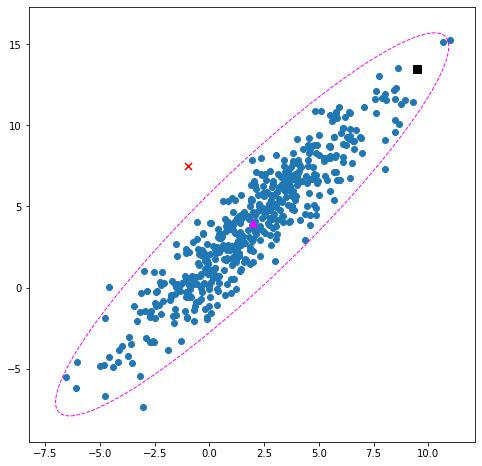

In [ ]:
# Mahalanobis distance example.

# Specifying the parameters for the new dataset.
n = 500                          # Number of points.
dependency = [[0.85, 0.45],      # Defines the dependency
              [-0.55, -0.65]]    # between the points.
mu = 2, 4                        # The mean of the distribution.
scale = 3, 5                     # The scale of the distribution.
outlier = np.array([-1, 7.5])    # Point outside 3 std. of the distribution.
inlier = np.array([9.5, 13.5])   # Point inside 3 std. of the distribution.

# Generating a correlated dataset.
np.random.seed(42)
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    return dependent * scale + mu
data = get_correlated_dataset(n, dependency, mu, scale)

# Draw the data distribution.
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(data[:,0], data[:,1])
plt.scatter(mu[0],      mu[1],      c="fuchsia", marker="^", s=50)
plt.scatter(outlier[0], outlier[1], c="red",    marker="x", s=50)
plt.scatter(inlier[0],  inlier[1],  c="black",  marker="s", s=50)
confidence_ellipse(data[:,0], data[:,1], ax=ax, n_std=3.0, 
                   edgecolor='fuchsia', linestyle='--')

# Define the Mahalanobis distance as a function of covariance matrix inverse.
M = np.linalg.inv(np.cov(data.T))
euclidean = DistanceMetric.get_metric("euclidean")
mahalanobis = DistanceMetric.get_metric("mahalanobis", VI=M)

# Compute Euclidean & Mahalanobis distances 
print("Euclidean distance between mu & inlier:   {:5.2f}".format(
      np.sqrt(np.dot((mu - inlier), (mu - inlier)))))
      #float(euclidean.pairwise([mu], [inlier]))))
print("Euclidean distance between mu & outlier:  {:5.2f}".format(
      np.sqrt(np.dot((mu - outlier), (mu - outlier)))))
      #float(euclidean.pairwise([mu], [outlier]))))
print("Mahalanobis distance between mu & inlier: {:5.2f}".format(
      np.sqrt(np.dot(np.dot((mu - inlier), M), (mu - inlier)))))
      #float(mahalanobis.pairwise([mu], [inlier]))))
print("Mahalanobis distance between mu & outlier:{:5.2f}".format(
      np.sqrt(np.dot(np.dot((mu - outlier), M), (mu - outlier)))))
      #float(mahalanobis.pairwise([mu], [outlier]))))

# From distances to transformations

## Finding alternatives for matrix $M$

So we've seen that using the inverse covariance matrix is great for finding distance within a distribution. But since the Mahalanobis distance is parameterized, we could try to find a specific $M\in\mathbb{R}^{n\times n}$ that helps us in our specific supervised task. But which other matrices could we use for $M$ instead of the inverse covariance matrix?

So looking into the definition of the Mahalanbois distance - we see that in order for the distance to be defined and non-negative, for every two data points $\vec{x},\vec{y}$, if we set $\vec{z}=\vec{x}-\vec{y}$, we get that: 
$d_M(\vec{x},\vec{y}) = \sqrt{\vec{z}^TM\vec{z}} \Rightarrow \vec{z}^TM\vec{z} \ge 0$.

The family of matrices that satisfy for every $\vec{z} \in \mathbb{R}^n$ that $\vec{z}^TM\vec{z} \ge 0$ is called **positive semidefinite (PSD) matrices**. Any PSD matrix (denoted as $M \succeq 0$) can serve as the parameter for the Mahalanobis distance (and indeed, the inverse covariance matrix $M=cov(X)^{-1}$ is a positive semidefinite matrix).


## How do we find new PSD matrices?

PSDs have some interesting characteristics which you can [read about](http://theanalysisofdata.com/probability/C_4.html). But for our topic, we will focus on one trait: a matrix $M$ is a PSD ($M\succeq 0$) if and only if there exists another matrix $L$ such that $L^TL=M$.

This leads us once again the definition of the Mahalanobis distance:

$d_M(\vec{x},\vec{y}) = \sqrt{(\vec{x}-\vec{y})^TM(\vec{x}-\vec{y})} = \sqrt{(\vec{x}-\vec{y})^TL^TL(\vec{x}-\vec{y})} = \sqrt{(L(\vec{x}-\vec{y}))^TL(\vec{x}-\vec{y})} = \sqrt{(L\vec{x}-L\vec{y})^T(L\vec{x}-L\vec{y})}$.

Now comes the coolest part in the entire notebook. If we evaluate that expression, we see that the **Mahalanobis distance between $\vec{x}$ and $\vec{y}$ parameterized by $M$** is actually equal to the **Euclidean distance between $L\vec{x}$ and $L\vec{y}$**, which are $\vec{x}$ and $\vec{y}$ in the transformed (latent) space after applying the the linear transformation defined by $L$.

And since every matrix $L$ could generate a PSD by $L^TL$, it's much easier to search and learn *a meaningful transformation $L$* such that the Euclidean distance is meaningful in the latent space, than it is to learn the Mahalanobis distance directly.

Or as Drake says:

![](https://drive.google.com/uc?export=view&id=1aybX_N9PR2tv_vEh3_TVIzj0rP7x7iMY)

## Example transformation: PCA Whitening

PCA uses the inverse covariance matrix to rotate the axes across their variance.
But when fitting a PCA transformation using <code>sklearn.decomposition.PCA</code>, you can specify <code>whiten=True</code>. [Whitening transformation](https://en.wikipedia.org/wiki/Whitening_transformation) not only rotates the axes, but also transforms the data into the latent space of the Mahalanobis distance parameterized by the inverse covariance matrix. 

Basically, the Euclidean distance in the new transformed space is the same as the Mahalanobis distance in the original space.

We could see this behavior using the same dummy dataset as before. This code shows the PCA transformation on our original dummy data - first the regular PCA, and then the whitening. We see that the Euclidean distance between the mean and the inlier / outlier doesn't change from the original space (PCA only rotates the axes on which the data lies), but the whitening transformation makes the Euclidean distance in the latent space equal to the Mahalanobis distance in the original space.


Euclidean distance in latent space PCA(whiten=False):
* Between mu & inlier:  12.10
* Between mu & outlier:  4.61
Euclidean distance in latent space PCA(whiten=True):
* Between mu & inlier:   2.52
* Between mu & outlier:  4.99


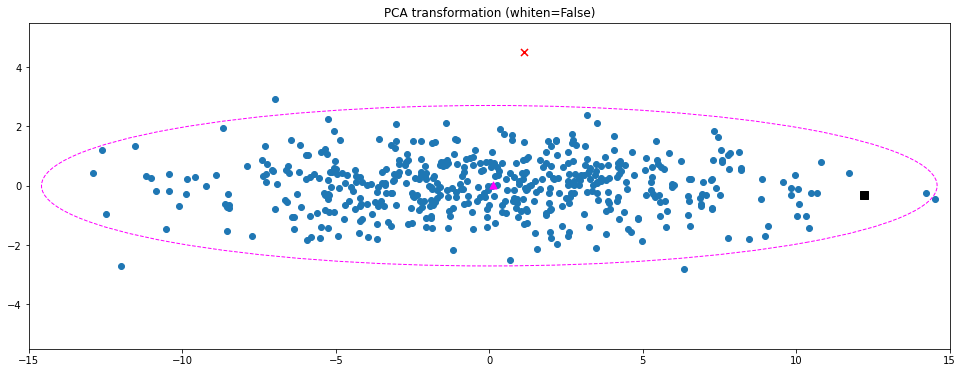

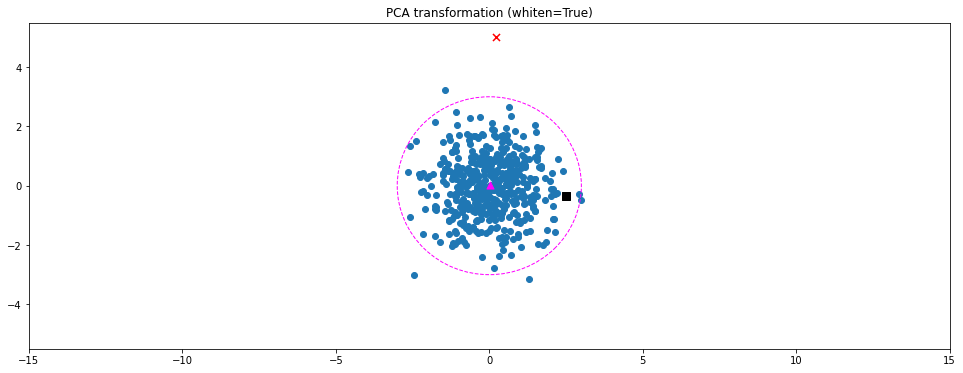

In [ ]:
from sklearn.decomposition import PCA

def draw_pca_data(data, mu, inlier, outlier, whiten):
  # Transforms the data to the latent space.
  pca = PCA(whiten=whiten).fit(data)
  latent_data = pca.transform(data)
  latent_mu = pca.transform([mu])[0]
  latent_outlier = pca.transform([outlier])[0]
  latent_inlier = pca.transform([inlier])[0]
  # Draw figure.
  fig, ax = plt.subplots(1, 1, figsize=(16.5, 6))
  plt.scatter(latent_data[:,0], latent_data[:,1])
  confidence_ellipse(latent_data[:,0], latent_data[:,1], ax=ax, 
                    n_std=3.0, edgecolor='fuchsia', linestyle='--')
  plt.scatter(latent_mu[0],      latent_mu[1],      c="fuchsia", marker="^", s=50)
  plt.scatter(latent_outlier[0], latent_outlier[1], c="red",    marker="x",  s=50)
  plt.scatter(latent_inlier[0],  latent_inlier[1],  c="black",  marker="s",  s=50)
  plt.title(f"PCA transformation (whiten={whiten})")
  plt.ylim([-5.5,5.5])
  plt.xlim([-15,15]);
  # Compute Euclidean distance in the latent space.
  print(f"Euclidean distance in latent space PCA(whiten={whiten}):")
  print("* Between mu & inlier:  {:5.2f}".format(
        np.sqrt(np.dot((latent_mu - latent_inlier), 
                      (latent_mu - latent_inlier)))))
  print("* Between mu & outlier: {:5.2f}".format(
        np.sqrt(np.dot((latent_mu - latent_outlier), 
                      (latent_mu - latent_outlier)))))
  
draw_pca_data(data=data, mu=mu, inlier=inlier, outlier=outlier, whiten=False)
draw_pca_data(data=data, mu=mu, inlier=inlier, outlier=outlier, whiten=True)


# Learning a transformation
In this section, I'll explain a bit what is required to learn a meaningful transformation to a latent space.

## Isn't it just manifold learning?
Both *manifold learning* and *metric learning* are subfields of representation-learning used to learn a transformation from the original feature space to a new latent space. The main difference is in the **supervision**: 
* Manifold learning discovers a transformation to lower dimensional space *without supervision*, often trying to preserve both local and global relationships that exists in the higher dimensional space. 
* Metric learning uses a provided supervision (i.e. an indication of similarity & dissimilarity between sets of data points) to learn a new representation, where the guidance provided is reflected.

So to make it easy: ***supervised = metric learning, unsupervised = manifold learning***.

If you're interested in manifold learning, you can find more information on:

* The [scikit-learn manifold learning page](https://scikit-learn.org/stable/modules/manifold.html) with the provided algorithms in the package.

* The Wikipedia page for [nonlinear dimensionality reduction](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction).
* Two very common non-linear manifold learning approaches today are [t-distributed Stochastic Neighborhood Embedding](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) (tSNE) and [Uniform Manifold Approximation and Projection](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) (UMAP). [This page](https://pair-code.github.io/understanding-umap/) and [this page](https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17) both beautifully illustrate some of the differences between them.

## What kind of supervision is supported?

As opposed to classification or regression problems, where every instance during training is associated with some sort of label (either a class or a measurement), metric learning can have several types of supervision which are an indication of either: a similarity between instances, a dissimilarity between instances, or a combination of both.

As you read through literature and loss functions, you will see supervisions described as:
* **Tuples**: Usually comes in two sets (*positive* tuples and *negative* tuples), each set contains pairs of data points $(a,b)$ that are either an indication that $a$ is similar to $b$ (for *positive* tuples) or that $a$ is dissimilar to $b$ (for *negative* tuples).
* **Triplets**: A set where each element is an combination of three data points $(a, b, c)$ that indicate that $a$ is more similar to $b$ than it is to $c$, and therefore in the latent space $dist(a,b) < dist(a,c)$. 
* **Quadruples**: A set where each element is a combination of four data points $(a,b,c,d)$ that indicate that $a$ is more similar to $b$ than $c$ is similar to $d$, and therefore in the latent space $dist(a,b) < dist(c,d)$.

You can imagine how to translate a regular classification problem (with a class assigned to each point) to each of the setting described (i.e. each members of the same class needs to be similar to each other in the latent space, and dissimilar to other classes).

At the same time, it allows metric learning algorithms to take into account weaker supervision (i.e. a user liked movie $a$ more than movie $b$).

## Loss functions

In classification and regression problem loss functions are usually composed of a (often differential) transformation

A metric learning loss function combines three elements:
1. **The transformation function**: A differential transformation function $\phi(x): \mathbb{R}^n \rightarrow \mathbb{R}^d$ could either be a linear transformation, as we've seen in the Mahalanobis distance (i.e., $\phi(x) = Lx$ where $L \in \mathbb{R}^{d\times n}$), but it could also be a non-linear transformer (i.e. DNN or other feature ensembles) from an $n$-dimensional space to a $d$-dimensional space. The parameters of these functions w

2. **The selected distance function to use in the latent space**: Most often, it would be either the Euclidean distance or the Cosine distance (which may be more meaningful in higher dimensional data).

3. **The objective**: Using the provided supervision, the transformation function and the desired metric, we formalize an optimization problem. The specified supervision incorporated to a differentiable function to minimze or maximize.


### Example loss function: LMNN

Let's take for example one of the more common metric learning loss function: Large Margin Nearest Neighbors (LMNN).
loss function of LMNN is described as:

$\large\min_\limits{L}~~~ 
\lambda\underbrace{\sum_{i,~j\in N_i} ||Lx_i-Lx_j||_2^2}_\text{pull target neighbors} ~+(1-\lambda)~
\underbrace{\sum_{i,~j\in N_i,~k\notin N_i} max(0, 1 + ||Lx_i-Lx_j||_2^2 - ||Lx_i-Lx_k||_2^2)}_\text{push away impostors from the neighborhood}$

In this case:
1. The transformation function is **linear** and defined by $L$: from $x\in \mathbb{R}^n$, to $Lx \in \mathbb{R}^d$.
2. The distance function in the latent space is **Euclidean**, optimizing the loss function on the squared L2 distance: $d(\vec{a},\vec{b})^2 = ||\vec{a}-\vec{b}||_2^2$.
3. The objective of this loss function is composed of two parts:
    * A penalty for the squared distance between data points and their target neighbors (i.e. similar / within the same class), causing the optimization to ***pull*** them closer together in the latent space.
    * A penalty for impostors (dissimilar / of different class) which are closer to the point than the target neighbors + a margin, causing the optimization to ***push*** them away from the neighborhood.
    * The tradeoff between the two parts of the optimization is managed by the $\lambda$ parameter, where $\lambda=0.5$ is equal weight to the terms (best $\lambda$ could be discovered by cross-validation).

You can find more information on Large Margin Nearest Neighbors in its [wikipedia page](https://en.wikipedia.org/wiki/Large_margin_nearest_neighbor) and in the [2005 paper](https://proceedings.neurips.cc/paper/2005/hash/a7f592cef8b130a6967a90617db5681b-Abstract.html) by Weinberger, Blitzer and Saul.

![An illustration of LMNN](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Lmnn.png/800px-Lmnn.png)

### Other examples for losses

Pulling target neighbors closer together and pushing the impostors away isn't the only way to detect a meaningful transformation. You can find some other approaches in this [Tutorial on Distance Metric Learning](https://arxiv.org/pdf/1812.05944.pdf) by Juan Luis Suárez-Dı́az, Salvador Garcı́a and Francisco Herrera (2020), and a more complete overview in this [Survey and experimental study on metric learning methods](https://www.researchgate.net/profile/Dewei-Li/publication/325862375_Survey_and_experimental_study_on_metric_learning_methods/links/5b4fed11a6fdcc8dae2b48ea/Survey-and-experimental-study-on-metric-learning-methods.pdf) by Dewei Li and Yingjie Tian. 

Some ideas are quite elegant, and worth knowing / reading, like:

* Neighborhood component analysis ([NCA](https://en.wikipedia.org/wiki/Neighbourhood_components_analysis)) - An algorithm aimed at improving the accuracy of the k-neighbors classifier, by optimizing the expected leave-one-out accuracy for the nearest neighbor classification.

* Information Theory Metric Learning ([ITML](https://www.cs.utexas.edu/users/pjain/pubs/metriclearning_icml.pdf)) - An information theory based technique that aims at minimizing the Kullback-Leibler divergence with respect to an initial gaussian distribution, but while keeping certain similarity constraints between data.

* Bonus read: Learning with Side-Information ([LSI](https://papers.nips.cc/paper/2164-distance-metric-%20learning-with-application-to-clustering-with-side-information.pdf)) - which was one of the first papers on the topic of distance metric learning, introducing the topic in 2003, and **written by famous AI celebrities like Michael Jordan, Stuart Russel and Andrew Ng**. 

### Deep metric learning

Today, a lot of the progress in the field is done with metric learning as mean of expanding some of the great progress that was done in general-purpose representations (i.e. word embeddings, computer vision & convolution networks) and expanding this to learn domain-specific distances (i.e. self-identification, image segmentation).

**A truly terrific source** for many things deep (and not so deep) metric learning can be found in [Dae Ha Kim's Survey of Deep Metric Learning](https://github.com/kdhht2334/Survey_of_Deep_Metric_Learning).

A cool library for building deep metric learning models is this [PyTorch Metric Learning](https://github.com/KevinMusgrave/pytorch-metric-learning), mainly developed by Kevin Musgrave from Cornell University. You can find examples to several [loss functions](https://kevinmusgrave.github.io/pytorch-metric-learning/losses/) which it currently supports, each loss associated with its own objective, distance function, and a manner in which it samples the pairs / tuples / triplets for supervision for each batch.

## The different variants of metric learning.

---



https://www.researchgate.net/profile/Dewei-Li/publication/325862375_Survey_and_experimental_study_on_metric_learning_methods/links/5b4fed11a6fdcc8dae2b48ea/Survey-and-experimental-study-on-metric-learning-methods.pdf

Linear transformations have some nice properties (works well on small datasets, generalizes to unseen data points or labels easily and evaluation is faster), but there are many ways to expand the linear transformation to a non-linear transformation, replacing the $L\in \mathbb{R}^n$ with $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^d$.

An updated source of different approaches can be [found here](https://github.com/kdhht2334/Survey_of_Deep_Metric_Learning).

![](https://raw.githubusercontent.com/kdhht2334/Survey_of_Deep_Metric_Learning/master/pic/pedigree.png)


# References

https://pydml.readthedocs.io/en/latest/

http://contrib.scikit-learn.org/metric-learn/

https://umap-learn.readthedocs.io/en/latest/supervised.html

Lecture: https://www.youtube.com/watch?v=GhsHPY3-1zY

Surveys & tutorials:
https://github.com/kdhht2334/Survey_of_Deep_Metric_Learning
https://arxiv.org/pdf/1812.05944


# Exercise: Bank Customer Service - BANKING77
We will showcase how metric learning techniques can be useful tool for transfer learning, thus learning a new representation of the data that is domain specific and for the purpose of differentiating between the classes of the domain.

For this example, we use a dataset built by a bank customer service, called **BANKING77**. It was made available by *Iñigo Casanueva, Tadas Temčinas, Daniela Gerz, Matthew Henderson, Ivan Vulić* in their paper [Efficient Intent Detection with Dual Sentence Encoders](https://arxiv.org/abs/2003.04807), and the database itself can be found in the [PolyAI-LDN github](https://github.com/PolyAI-LDN/task-specific-datasets).

The BANKING77 dataset comprises 13,083 customer service queries, labeled with 77 intents. As the authors state, it focuses on fine-grained single-domain intent detection and contains some ambiguity that makes the problem difficult for a human reviewer as well.

In this example, we will try to find a representation of the data which differentiate between the different categories.

In [ ]:
import pandas as pd
import numpy as np
import random

def read_dataset(set_name: str, show_samples:int=0 , random_state:int=42):
    # Retrieve the banking data from the github repository.
    url = f"https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/{set_name}.csv"
    dataset = pd.read_csv(url)
    # Describe the dataset.
    print(f"There's a total of [{len(dataset)}] texts " +
          f"across [{len(set(dataset['category']))}] categories in the [{set_name}] set.\n")
    # Show an example of the dataset.
    if show_samples:
        print("Here are some examples:\n------------------------")
        for _, row in dataset.sample(show_samples, random_state=random_state).iterrows():
            print(f"category: {row.category}\ntext: {row.text}\n")  
    # Return the read dataset.
    return dataset

train_df = read_dataset("train", show_samples=4)
test_df = read_dataset("test", show_samples=4)


There's a total of [10003] texts across [77] categories in the [train] set.

Here are some examples:
------------------------
category: change_pin
text: Is it possible for me to change my PIN number?

category: declined_card_payment
text: I'm not sure why my card didn't work

category: top_up_failed
text: I don't think my top up worked

category: card_payment_fee_charged
text: Can you explain why my payment was charged a fee?

There's a total of [3080] texts across [77] categories in the [test] set.

Here are some examples:
------------------------
category: card_linking
text: How do I link this new card?

category: card_swallowed
text: How do I retrieve my card from the machine?

category: verify_source_of_funds
text: I want to know where the funds come from.

category: automatic_top_up
text: I just activated auto top-up, but it is not letting me enable it. Why not?



## Step 0: Subsampling

This step isn't really required if you have sufficient time and computation power, but as this is a tutorial notebook for an hour's training, I wanted to limit the number of sententences per category to a feasible number. Feel free to train on the full dataset in your spare time by increasing the <code>samples_per_category</code> parameter to 200.

In [ ]:
# Sample a number of sentences per category.
def sample_and_aggregate_dataset(df:pd.DataFrame, samples_per_category:int=20, 
                                 random_state:int=42, verbose:bool=False):
  """ Aggregating on category, sampling a number of queries per category. """
  random.seed(random_state)
  agg_df = pd.DataFrame(
    df.groupby("category").agg(
        lambda corpus: random.sample(list(corpus), min([samples_per_category, len(corpus)])))   
      .to_records())
  return agg_df

train_agg_df = sample_and_aggregate_dataset(train_df, samples_per_category=10, verbose=True)
test_agg_df = sample_and_aggregate_dataset(test_df, samples_per_category=2000, verbose=True)

print(f"Total number of points in train set reduced to [{sum(train_agg_df.text.map(len))}].")
print(f"Total number of points in test set reduced to [{sum(test_agg_df.text.map(len))}].")


Total number of points in train set reduced to [770].
Total number of points in test set reduced to [3080].


## Step 1: Sentence embedding

To get from the textual representation of the customer query to a vectorized representation, we will use some state-of-the-art BERT setentence embeddings. These general-domain transformers are used to project a textual sentence (usually up to 128 words) into a 300-768 dimension embedding which should preserve their semantic meaning. This would be used as our initial input for metric learning, where we would learn a bank-specific representation.

You can find more information on sentence embedding in:
* The [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://www.sbert.net/) package.
* This [Analytics Vidhya post](https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/) by Purva Huilgol.
* This [evaluation](https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0) of pretrained sentence-embedding transformers (full supported list of pretrained models could be found [here](https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/)).
* The ["Sentence Embedding" task page](https://paperswithcode.com/task/sentence-embedding) in PapersWithCode.com

In [ ]:
# Installing the package.
!pip install -q huggingface-hub==0.0.12 
!pip install -q sentence-transformers
!pip install -q pytorch-metric-learning[with-hooks]
!pip install -q umap-learn 
!pip install -q umap-learn[plot]
!pip install -q metric-learn
!pip install -q altair 
!pip install -q vega_datasets

     |████████████████████████████████| 85 kB 3.1 MB/s 
     |████████████████████████████████| 2.6 MB 18.1 MB/s 
     |████████████████████████████████| 1.2 MB 60.2 MB/s 
     |████████████████████████████████| 636 kB 75.5 MB/s 
     |████████████████████████████████| 3.3 MB 47.1 MB/s 
     |████████████████████████████████| 895 kB 53.1 MB/s 
     |████████████████████████████████| 105 kB 7.9 MB/s 
     |████████████████████████████████| 89.7 MB 5.4 kB/s 
     |████████████████████████████████| 80 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 17.2 MB/s 
     |████████████████████████████████| 15.8 MB 625 bytes/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 769 kB 41.6 MB/s 
     |████████████████████████████████| 118 kB 56.9 MB/s 
     |████████████████████████████████| 766 kB 48.0 MB/s 
     |████████████████████████████████| 1.0 MB 24.4 MB/s 
     |████████████████████████████████| 722 kB 49.3 MB/s 
     |████████████

In [ ]:
device = "cpu"  # Change to "cuda" if you run with GPU.
# Loading the pretrained sentence BERT model.
from sentence_transformers import SentenceTransformer
# STSB = Sentence Transformer Siamese BERT.
# Note: Recently I've received error that the download 
sbert_model = SentenceTransformer('stsb-mpnet-base-v2', device=device)

In [ ]:
# Embed the samples in with the sentence2vec transformer. May take a 4-8 minutes if on CPU...
train_agg_df["sentence2vec"] = train_agg_df["text"].map(sbert_model.encode)
test_agg_df["sentence2vec"] = test_agg_df["text"].map(sbert_model.encode)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create training & testing datasets.
le = LabelEncoder().fit(train_agg_df["category"])
def build_dataset_matrix(agg_df:pd.DataFrame):  
  features = np.concatenate(agg_df["sentence2vec"])
  targets = [[row["category"]] * len(row["sentence2vec"]) for _, row in agg_df.iterrows()]
  targets = np.array([item for subl in targets for item in subl])
  targets = le.transform(targets)
  return features, targets

X_train, y_train = build_dataset_matrix(train_agg_df)
X_test, y_test = build_dataset_matrix(test_agg_df)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((770, 768), (770,), (3080, 768), (3080,))

## Step 2: Evaluating the embedding

Before we begin with the metric learning, let's first evaluate our initial general-purpose embeddings. There are different ways of measuring embeddings, but a common practice is to look into the neighborhoods and see if the nearby neighbors are semantically similar. Throughout the notebook, we will use three ways to evaluate the embedding.

1. ***k*-Nearest Neighbor accuracy**: For a given *k* number of neighbors, we would record the accuracy of using a *k*-Nearest classier, where neighbors are weighted by the distance.

2. **Neighborhood purity**: For a given *k* number of neighbors, we would count for each test point how many of the closest *k* training neighbors in the latent space are from the same class. It would be the same as the accuracy for k=1, but for higher value *k*'s it expected to be lower and a better representation of the homogeneity of the neighborhoods.

3. **2-dimensional scatter plot**: We will render the data points in the latent space on a 2-dimensional plain. For interactive visualizerion, we will use the **Altair library** which supports us in declarative visualization. You can learn more about the library at the [package's website](https://altair-viz.github.io/).



In [ ]:
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt

def unpack_agg_dataset(agg_df:pd.DataFrame, dataset_name:str):
  dataset_records = [[{"dataset": dataset_name, "category": row.category, "query": text} for text in row.text] 
                     for _, row in agg_df.iterrows()]
  dataset_records = [item for subl in dataset_records for item in subl]
  return pd.DataFrame(dataset_records)

train_vis_df = unpack_agg_dataset(train_agg_df, "train")
test_vis_df = unpack_agg_dataset(test_agg_df, "test")
vis_df = pd.concat([train_vis_df,test_vis_df])


### A note about visualizing the neighborhoods.
In order to visualize the embedding, we would need to reduce the dimensionality of the embeddings from a *d*-dimensional latent space, to a 2-dimensional latent space.

In [ ]:
def render_embedding(vis_df, title, coord_0_col, coord_1_col):
  return alt.Chart(vis_df, title=title).mark_circle(size=50).encode(
      x=coord_0_col, 
      y=coord_1_col, 
      color=alt.Color('category', legend=None), 
      tooltip=['dataset', 'category', 'query'],
    ).interactive().properties(width=800,height=800)


Using PCA to do this dimensionality reduction would lose much of the embedding information regarding the relationship between the entitites, as you will be able to see in the next cell.

In [ ]:
from sklearn.decomposition import PCA

embeddings_pca = PCA(n_components=2).fit(X_train).transform(np.concatenate([X_train, X_test]))
vis_df["embeddings_pca_0"] = embeddings_pca[:,0]
vis_df["embeddings_pca_1"] = embeddings_pca[:,1]

render_embedding(vis_df, title="query =[STSB]=> 768 =[PCA]=> 2 (Not very useful...)", 
                 coord_0_col='embeddings_pca_0', 
                 coord_1_col='embeddings_pca_1')

alt.Chart(...)

Instead, we will use **t-SNE** as a manifold learning approach that aims to preserves the local neighborhood distances. Note that the evaluation of the accuracy & neighborhood purity will be done on the d-dimensional space, not the 2-dimensional space, but it should be a good enough illustration.

In [ ]:
from sklearn.manifold import TSNE
embeddings_tsne = TSNE(random_state=42).fit_transform(X=np.concatenate([X_train,X_test]))
vis_df["embeddings_tsne_0"] = embeddings_tsne[:,0]
vis_df["embeddings_tsne_1"] = embeddings_tsne[:,1]

render_embedding(vis_df, title="query =[STSB]=> 768 =[TSNE]=> 2 (Better!)", 
                 coord_0_col='embeddings_tsne_0', 
                 coord_1_col='embeddings_tsne_1')

alt.Chart(...)

### Computing the accuracy & neighborhood purity

While we're visually evaluating on the 2-dimensional space after the t-SNE transformation, the embedding on the latent space will be evaluated on the representation just before going down to 2D.

We will keep track of the results we gather with the named tuples, which we will later turn to a Pandas dataframe. I've provided this code to help you keep track of your experiments.

In [ ]:
import pandas as pd
from IPython.display import display

from collections import namedtuple
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Measurement = namedtuple("Measurement", ["k", "measurement_type", "value"])
recorded_results = {}

def test_neighbor_purity(pred_probs, labels):
  """ Checks how many of the train neighbors had the same label as the test instance. """ 
  return sum(pred_prob[label] for pred_prob, label in zip(pred_probs, labels)) / len(labels) 

def record_embeddings_performance_metrics(model_name, 
                                          embeddings_train, y_train, 
                                          embeddings_test, y_test, 
                                          recorded_results):
  """ Records the embeddings results. """
  recorded_results[model_name] = []  
  for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance").fit(embeddings_train, y_train)
    recorded_results[model_name].append(
        Measurement(k=k, measurement_type="accuracy", 
                    value=accuracy_score(knn.predict(embeddings_test), y_test)))
    recorded_results[model_name].append(
        Measurement(k=k, measurement_type="purity", 
                    value=test_neighbor_purity(knn.predict_proba(embeddings_test), y_test)))

def display_recorded_results(recorded_results):
  """ Renders the recorded results into tables. """
  # Creates a dataframe with all the model results.
  all_models_results = []
  for model_name in recorded_results.keys():
    model_results = pd.DataFrame(recorded_results[model_name])
    model_results.insert(0, "model_name", model_name)
    all_models_results.append(model_results)
  all_models_results_df = pd.concat(all_models_results)
  # Display pivots of the all model results dataframe based on measurement type.
  for measurement_type in set(all_models_results_df["measurement_type"]):
    print(f"Model results for measuring [{measurement_type}].")
    display(all_models_results_df[all_models_results_df["measurement_type"] == measurement_type]
            .pivot("model_name", "k", "value"))
    print(f"\n\n")

As you experiment with the notebook, record your embeddings in the following way, specifying your `model_name` and replacing `X_train` and `X_test` with the embeddings you've learned for the training and testing instances.

In [ ]:
record_embeddings_performance_metrics(model_name="1. Baseline STSB", 
                                      embeddings_train=X_train, y_train=y_train,
                                      embeddings_test=X_test, y_test=y_test,
                                      recorded_results=recorded_results)
display_recorded_results(recorded_results=recorded_results)

Model results for measuring [purity].


k                        3         5         7         9
model_name                                              
1. Baseline STSB  0.662998  0.590961  0.530094  0.479164




Model results for measuring [accuracy].


k                        3         5         7         9
model_name                                              
1. Baseline STSB  0.750974  0.738961  0.724026  0.721429

This combines both the performance metrics and the 2D representation.

In [ ]:
def record_results(model_name, 
                   embeddings_train, y_train, 
                   embeddings_test, y_test, 
                   vis_df, recorded_results):
  # Calculate the given embeddings' performance metrics.
  record_embeddings_performance_metrics(
      model_name=model_name, 
      embeddings_train=embeddings_train, y_train=y_train,
      embeddings_test=embeddings_test, y_test=y_test,
      recorded_results=recorded_results)
  # Displays the recorded results tables.
  display_recorded_results(recorded_results=recorded_results)
  # Compute a t-SNE 2D representation of the embeddings.
  embeddings_2d_tsne = TSNE(random_state=42).fit_transform(
      X=np.concatenate([embeddings_train,embeddings_test]))
  # Keep track of 2D representation and render to interactive Altair visualization.
  model_name_clean = model_name
  for dirty_char, clean_char in {' ': '_', '.': '_', '[': '(', ']': ')'}.items():
    # Fixing weird Altair column name issue.
    model_name_clean = model_name_clean.replace(dirty_char, clean_char)
  vis_df[f"tsne_0_{model_name_clean}"] = embeddings_2d_tsne[:,0]
  vis_df[f"tsne_1_{model_name_clean}"] = embeddings_2d_tsne[:,1]
  return render_embedding(
      vis_df, 
      title=f"Query (text) -> STSB(d=768) -> [{model_name}] -> TSNE (d=2)", 
      coord_0_col=f"tsne_0_{model_name_clean}", 
      coord_1_col=f"tsne_1_{model_name_clean}")

## Step 3.1: Linear metric learning
We will use LMNN, but feel free to [explore the package](http://contrib.scikit-learn.org/metric-learn/metric_learn.html#supervised-learning-algorithms) and try other types of linear transformations, such as NCA or ITML.

Also, we're reducing the number of components in the new representation from 768 to 128, for two main reasons. First, it's faster to learn a transformation matrix of size (768 x 128) than it is of size (768 x 768). But more importantly, the core reasoning behind using a lower dimension is that if we used 768 features to represent the variance of a general purpose sentence, you don't need that many feaures to differentiate between the 77 categories of banking queries. And third, because we a small number of data points, using a smaller dimension in the latent space helps us avoid overfitting.

We train the LMNN transformer with `verbose=True` so you could follow up on what happens. The will see two interesting details: 
* The **objective**, which is the same objective function described above, which with gradient descend we will attempt to lower every iteration.
* The **active constraints**, which are how many "impostors" are there inside neighborhoods they shouldn't be a part of. The lower this number is, the more "pure" and homogeneous the neighbors after the transformation.

When you attempt to beat this baseline, try different values for `n_components` (number of dimensions in the output representation), `k` (how many neighbors should we take into account when searching for impostors) and `regularization` which determines the ratio between pushing and pulling.

If your attempt doesn't converge, try increasing the `learn_rate` or increase the `max_iter`.

In [ ]:
from metric_learn import LMNN
lmnn = LMNN(n_components=128, k=5, 
            learn_rate=1e-2, max_iter=2000, random_state=42, 
            verbose=True).fit(X_train, y_train)

Finding principal components... 
done in  0.14s
iter | objective | objective difference | active constraints | learning rate
2 44099.39433807651 -47720.04262290703 43234 3.9453125e-05
3 27677.60710023286 -16421.78723784365 30948 3.984765625e-05
4 21277.883072782977 -6399.724027449884 23656 4.02461328125e-05
5 18941.432226483717 -2336.45084629926 21175 4.0648594140625e-05
6 17360.01495186803 -1581.4172746156873 19504 4.105508008203125e-05
7 16137.792572603847 -1222.2223792641835 18243 4.1465630882851565e-05
8 15141.883286136743 -995.9092864671038 17302 4.1880287191680084e-05
9 14299.468096019838 -842.4151901169043 16474 4.229909006359688e-05
10 13575.598371513868 -723.8697245059702 15723 4.272208096423285e-05
11 12944.197491209807 -631.4008803040615 15102 4.314930177387518e-05
12 12384.809828893285 -559.3876623165215 14560 4.358079479161393e-05
13 11883.84681991513 -500.9630089781549 14062 4.4016602739530074e-05
14 11431.752725105292 -452.09409480983777 13599 4.445676876692537e-05
15 11

In [ ]:
record_results(model_name="2. LMNN (d=128, k=5)",
               embeddings_train=lmnn.transform(X_train), y_train=y_train,
               embeddings_test=lmnn.transform(X_test), y_test=y_test,
               vis_df=vis_df, recorded_results=recorded_results)

Model results for measuring [purity].


k                            3         5         7         9
model_name                                                  
1. Baseline STSB      0.662998  0.590961  0.530094  0.479164
2. LMNN (d=128, k=5)  0.802916  0.798411  0.791806  0.782693




Model results for measuring [accuracy].


k                            3         5         7         9
model_name                                                  
1. Baseline STSB      0.750974  0.738961  0.724026  0.721429
2. LMNN (d=128, k=5)  0.809091  0.809091  0.807143  0.805195

alt.Chart(...)

## Step 3.2: Deep metric learning

You can't do learning without deep learning, right? :P

In this example, we're using **PyTorch metric learning** library to feed the data through a deep neural network, where the output isn't the prediction, but the representation of the data in the latent space.

You can read more about this in the theory part of the notebook, and in the [library's website](https://kevinmusgrave.github.io/pytorch-metric-learning/).

The cell below just defines some of the functionalities for working with tensorflow (dataset & dataloaders, train & test functions, accuracy estimators). 

For this exercise, just run it - you don't need to change anything.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
from pytorch_metric_learning import losses, miners, distances, reducers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

# Defining data loaders. You don't need to change those.
batch_size = 128
train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
test_dataset  = TensorDataset(torch.Tensor(X_test),  torch.Tensor(y_test))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=batch_size)


def train(model, loss_func, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        embeddings = model(data)
        indices_tuple = mining_func(embeddings, labels)
        loss =  loss_func(embeddings, labels, indices_tuple)
        loss.backward()
        optimizer.step()

### convenient function from pytorch-metric-learning ###
def get_all_embeddings(dataset, model):
    model.eval()
    tester = testers.BaseTester()
    return tester.get_all_embeddings(dataset, model)

### compute accuracy using AccuracyCalculator from pytorch-metric-learning ###
accuracy_calculator = AccuracyCalculator(k=5)
def test(train_set, test_set, model, accuracy_calculator):
    train_embeddings, train_labels = get_all_embeddings(train_set, model)
    test_embeddings, test_labels = get_all_embeddings(test_set, model)  
    print("Computing mean average precision at R")
    accuracies = accuracy_calculator.get_accuracy(
        query=test_embeddings, 
        reference=train_embeddings, 
        query_labels=torch.reshape(test_labels, (len(test_labels),)),       #test_labels, 
        reference_labels=torch.reshape(train_labels, (len(train_labels),)), #train_labels, 
        embeddings_come_from_same_source=False)
    print(f"Test set mean average precision at R = {accuracies['mean_average_precision_at_r']}")

**The cell below is the code which you may want to change / copy to your cell in the assignment. This is where you can configure your network and metric learning parameters, such as objective functions.**

In [ ]:
# Defining the metric learning network - This you may want to change.
#===================================================================== 
# Here you can define the network architecture, adding hidden layers or other types of layers.
# The in_features is the original 768-dimension STSB representation of the sentence.
# The last layer should export your data in the latent space. 

class MetricLearningNetwork(nn.Module):
    def __init__(self, in_features):
        super(MetricLearningNetwork, self).__init__()
        self.h1 = nn.Linear(in_features=in_features, out_features=128)
        self.dropout1 = nn.Dropout(p=0.2)
        self.out = nn.Linear(in_features=128, out_features=64)

    def forward(self, x):
        x = self.h1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.out(x)
        return x

# Instantiate the model & optimizer - you don't need to change 
# (maybe just the learning rate & num_epocs if the model doesn't converge).
learning_rate=0.01
num_epochs = 500
deep_metric_learning = MetricLearningNetwork(X_train.shape[1]).to(device)
optimizer = optim.Adam(deep_metric_learning.parameters(), lr=learning_rate)

# Defining the metric learning parameters (i.e. loss function) - This you may want to change.
#============================================================================================ 
# For more details & examples, check out https://kevinmusgrave.github.io/pytorch-metric-learning/losses/
distance = distances.LpDistance(p=2, power=1, normalize_embeddings=True)
reducer = reducers.AvgNonZeroReducer()
loss_func = losses.ContrastiveLoss(pos_margin=0, neg_margin=1, distance = distance, reducer = reducer)
mining_func = miners.AngularMiner(distance = distance)

# Train your model - you don't need to change, just enjoy the ride :).
for epoch in range(1, num_epochs+1):
    train(deep_metric_learning, loss_func, device, train_dataloader, optimizer, epoch)
    with torch.no_grad():
      train_loss = loss_func(deep_metric_learning(torch.Tensor(X_train).to(device)).cpu(),
                                                  torch.Tensor(y_train).cpu()).item()
      print("Epoch {} - train loss: {:8.4f}".format(epoch, train_loss))
    if not (epoch % 10):
      test(train_dataset, test_dataset,deep_metric_learning, accuracy_calculator)

Epoch 1 - train loss:   0.7867
Epoch 2 - train loss:   0.8107
Epoch 3 - train loss:   0.7862
Epoch 4 - train loss:   0.7723
Epoch 5 - train loss:   0.7620
Epoch 6 - train loss:   0.7724
Epoch 7 - train loss:   0.7477
Epoch 8 - train loss:   0.7468
Epoch 9 - train loss:   0.7520


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 10 - train loss:   0.7527


100%|██████████| 97/97 [00:03<00:00, 31.43it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.6045216450216451
Epoch 11 - train loss:   0.7392
Epoch 12 - train loss:   0.7393
Epoch 13 - train loss:   0.7313
Epoch 14 - train loss:   0.7238
Epoch 15 - train loss:   0.7174
Epoch 16 - train loss:   0.6985
Epoch 17 - train loss:   0.7208
Epoch 18 - train loss:   0.6990
Epoch 19 - train loss:   0.6973


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 20 - train loss:   0.6769


100%|██████████| 97/97 [00:03<00:00, 31.87it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.6784448051948051
Epoch 21 - train loss:   0.6764
Epoch 22 - train loss:   0.6813
Epoch 23 - train loss:   0.6789
Epoch 24 - train loss:   0.6714
Epoch 25 - train loss:   0.6484
Epoch 26 - train loss:   0.6637
Epoch 27 - train loss:   0.6441
Epoch 28 - train loss:   0.6477
Epoch 29 - train loss:   0.6511


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 30 - train loss:   0.6449


100%|██████████| 97/97 [00:03<00:00, 31.68it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.703715367965368
Epoch 31 - train loss:   0.6445
Epoch 32 - train loss:   0.6339
Epoch 33 - train loss:   0.6345
Epoch 34 - train loss:   0.6444
Epoch 35 - train loss:   0.6316
Epoch 36 - train loss:   0.6222
Epoch 37 - train loss:   0.6306
Epoch 38 - train loss:   0.6222
Epoch 39 - train loss:   0.6284


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 40 - train loss:   0.6322


100%|██████████| 97/97 [00:03<00:00, 31.62it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7177142857142855
Epoch 41 - train loss:   0.6178
Epoch 42 - train loss:   0.6170
Epoch 43 - train loss:   0.6308
Epoch 44 - train loss:   0.6210
Epoch 45 - train loss:   0.6204
Epoch 46 - train loss:   0.6267
Epoch 47 - train loss:   0.6168
Epoch 48 - train loss:   0.6087
Epoch 49 - train loss:   0.5996


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 50 - train loss:   0.6004


100%|██████████| 97/97 [00:03<00:00, 30.81it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7312900432900433
Epoch 51 - train loss:   0.6046
Epoch 52 - train loss:   0.5894
Epoch 53 - train loss:   0.5888
Epoch 54 - train loss:   0.5818
Epoch 55 - train loss:   0.6116
Epoch 56 - train loss:   0.6124
Epoch 57 - train loss:   0.5917
Epoch 58 - train loss:   0.6033
Epoch 59 - train loss:   0.5930


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 60 - train loss:   0.5932


100%|██████████| 97/97 [00:03<00:00, 30.96it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7494491341991342
Epoch 61 - train loss:   0.5989
Epoch 62 - train loss:   0.5931
Epoch 63 - train loss:   0.5926
Epoch 64 - train loss:   0.5816
Epoch 65 - train loss:   0.5891
Epoch 66 - train loss:   0.5772
Epoch 67 - train loss:   0.5813
Epoch 68 - train loss:   0.5748
Epoch 69 - train loss:   0.5737


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 70 - train loss:   0.5752


100%|██████████| 97/97 [00:03<00:00, 30.84it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.752
Epoch 71 - train loss:   0.5606
Epoch 72 - train loss:   0.5632
Epoch 73 - train loss:   0.5748
Epoch 74 - train loss:   0.5750
Epoch 75 - train loss:   0.5672
Epoch 76 - train loss:   0.5724
Epoch 77 - train loss:   0.5717
Epoch 78 - train loss:   0.5606
Epoch 79 - train loss:   0.5722


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 80 - train loss:   0.5507


100%|██████████| 97/97 [00:03<00:00, 31.00it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7608311688311687
Epoch 81 - train loss:   0.5688
Epoch 82 - train loss:   0.5501
Epoch 83 - train loss:   0.5562
Epoch 84 - train loss:   0.5592
Epoch 85 - train loss:   0.5641
Epoch 86 - train loss:   0.5693
Epoch 87 - train loss:   0.5581
Epoch 88 - train loss:   0.5528
Epoch 89 - train loss:   0.5640


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 90 - train loss:   0.5644


100%|██████████| 97/97 [00:03<00:00, 30.56it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7632002164502163
Epoch 91 - train loss:   0.5492
Epoch 92 - train loss:   0.5518
Epoch 93 - train loss:   0.5498
Epoch 94 - train loss:   0.5385
Epoch 95 - train loss:   0.5463
Epoch 96 - train loss:   0.5382
Epoch 97 - train loss:   0.5439
Epoch 98 - train loss:   0.5462
Epoch 99 - train loss:   0.5443


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 100 - train loss:   0.5384


100%|██████████| 97/97 [00:03<00:00, 30.54it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7609372294372294
Epoch 101 - train loss:   0.5436
Epoch 102 - train loss:   0.5379
Epoch 103 - train loss:   0.5412
Epoch 104 - train loss:   0.5390
Epoch 105 - train loss:   0.5424
Epoch 106 - train loss:   0.5501
Epoch 107 - train loss:   0.5426
Epoch 108 - train loss:   0.5470
Epoch 109 - train loss:   0.5379


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 110 - train loss:   0.5446


100%|██████████| 97/97 [00:03<00:00, 30.98it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7669512987012987
Epoch 111 - train loss:   0.5389
Epoch 112 - train loss:   0.5372
Epoch 113 - train loss:   0.5320
Epoch 114 - train loss:   0.5234
Epoch 115 - train loss:   0.5284
Epoch 116 - train loss:   0.5353
Epoch 117 - train loss:   0.5252
Epoch 118 - train loss:   0.5265
Epoch 119 - train loss:   0.5331


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 120 - train loss:   0.5350


100%|██████████| 97/97 [00:03<00:00, 30.76it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7647510822510822
Epoch 121 - train loss:   0.5216
Epoch 122 - train loss:   0.5168
Epoch 123 - train loss:   0.5281
Epoch 124 - train loss:   0.5294
Epoch 125 - train loss:   0.5271
Epoch 126 - train loss:   0.5302
Epoch 127 - train loss:   0.5235
Epoch 128 - train loss:   0.5258
Epoch 129 - train loss:   0.5313


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 130 - train loss:   0.5239


100%|██████████| 97/97 [00:03<00:00, 30.33it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7685562770562772
Epoch 131 - train loss:   0.5246
Epoch 132 - train loss:   0.5188
Epoch 133 - train loss:   0.5234
Epoch 134 - train loss:   0.5150
Epoch 135 - train loss:   0.5308
Epoch 136 - train loss:   0.5337
Epoch 137 - train loss:   0.5236
Epoch 138 - train loss:   0.5183
Epoch 139 - train loss:   0.5146


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 140 - train loss:   0.5150


100%|██████████| 97/97 [00:03<00:00, 30.19it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7732435064935066
Epoch 141 - train loss:   0.5355
Epoch 142 - train loss:   0.5301
Epoch 143 - train loss:   0.5159
Epoch 144 - train loss:   0.5187
Epoch 145 - train loss:   0.5168
Epoch 146 - train loss:   0.5147
Epoch 147 - train loss:   0.5146
Epoch 148 - train loss:   0.5123
Epoch 149 - train loss:   0.5046


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 150 - train loss:   0.5144


100%|██████████| 97/97 [00:03<00:00, 30.08it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7718690476190476
Epoch 151 - train loss:   0.5086
Epoch 152 - train loss:   0.5108
Epoch 153 - train loss:   0.5095
Epoch 154 - train loss:   0.5171
Epoch 155 - train loss:   0.5201
Epoch 156 - train loss:   0.5120
Epoch 157 - train loss:   0.4941
Epoch 158 - train loss:   0.5181
Epoch 159 - train loss:   0.5183


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 160 - train loss:   0.5073


100%|██████████| 97/97 [00:03<00:00, 30.14it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7762337662337663
Epoch 161 - train loss:   0.5155
Epoch 162 - train loss:   0.5102
Epoch 163 - train loss:   0.5141
Epoch 164 - train loss:   0.5181
Epoch 165 - train loss:   0.5088
Epoch 166 - train loss:   0.4978
Epoch 167 - train loss:   0.5034
Epoch 168 - train loss:   0.5175
Epoch 169 - train loss:   0.5053


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 170 - train loss:   0.5078


100%|██████████| 97/97 [00:03<00:00, 30.21it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7790530303030304
Epoch 171 - train loss:   0.4932
Epoch 172 - train loss:   0.5035
Epoch 173 - train loss:   0.5171
Epoch 174 - train loss:   0.4958
Epoch 175 - train loss:   0.4875
Epoch 176 - train loss:   0.5091
Epoch 177 - train loss:   0.4961
Epoch 178 - train loss:   0.5077
Epoch 179 - train loss:   0.5145


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 180 - train loss:   0.5034


100%|██████████| 97/97 [00:03<00:00, 30.00it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7762142857142856
Epoch 181 - train loss:   0.5009
Epoch 182 - train loss:   0.5053
Epoch 183 - train loss:   0.5030
Epoch 184 - train loss:   0.4893
Epoch 185 - train loss:   0.5080
Epoch 186 - train loss:   0.4873
Epoch 187 - train loss:   0.5059
Epoch 188 - train loss:   0.5084
Epoch 189 - train loss:   0.4935


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 190 - train loss:   0.5033


100%|██████████| 97/97 [00:03<00:00, 29.57it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7705876623376623
Epoch 191 - train loss:   0.4909
Epoch 192 - train loss:   0.4977
Epoch 193 - train loss:   0.5055
Epoch 194 - train loss:   0.5033
Epoch 195 - train loss:   0.4945
Epoch 196 - train loss:   0.5009
Epoch 197 - train loss:   0.5062
Epoch 198 - train loss:   0.5019
Epoch 199 - train loss:   0.4870


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 200 - train loss:   0.4943


100%|██████████| 97/97 [00:03<00:00, 29.23it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7758203463203464
Epoch 201 - train loss:   0.5056
Epoch 202 - train loss:   0.4960
Epoch 203 - train loss:   0.4942
Epoch 204 - train loss:   0.5000
Epoch 205 - train loss:   0.4847
Epoch 206 - train loss:   0.4865
Epoch 207 - train loss:   0.4954
Epoch 208 - train loss:   0.4994
Epoch 209 - train loss:   0.4894


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 210 - train loss:   0.5029


100%|██████████| 97/97 [00:03<00:00, 29.18it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7761060606060607
Epoch 211 - train loss:   0.4905
Epoch 212 - train loss:   0.4860
Epoch 213 - train loss:   0.4906
Epoch 214 - train loss:   0.4988
Epoch 215 - train loss:   0.5030
Epoch 216 - train loss:   0.5043
Epoch 217 - train loss:   0.4889
Epoch 218 - train loss:   0.4960
Epoch 219 - train loss:   0.4901


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 220 - train loss:   0.4938


100%|██████████| 97/97 [00:03<00:00, 28.64it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7728311688311689
Epoch 221 - train loss:   0.4820
Epoch 222 - train loss:   0.4825
Epoch 223 - train loss:   0.4845
Epoch 224 - train loss:   0.5064
Epoch 225 - train loss:   0.5059
Epoch 226 - train loss:   0.4874
Epoch 227 - train loss:   0.4966
Epoch 228 - train loss:   0.5055
Epoch 229 - train loss:   0.4939


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 230 - train loss:   0.4887


100%|██████████| 97/97 [00:03<00:00, 28.91it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7793290043290042
Epoch 231 - train loss:   0.4849
Epoch 232 - train loss:   0.4828
Epoch 233 - train loss:   0.4969
Epoch 234 - train loss:   0.4897
Epoch 235 - train loss:   0.4945
Epoch 236 - train loss:   0.4933
Epoch 237 - train loss:   0.4941
Epoch 238 - train loss:   0.4984
Epoch 239 - train loss:   0.4846


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 240 - train loss:   0.4849


100%|██████████| 97/97 [00:03<00:00, 29.25it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7753365800865801
Epoch 241 - train loss:   0.4838
Epoch 242 - train loss:   0.4884
Epoch 243 - train loss:   0.4948
Epoch 244 - train loss:   0.4904
Epoch 245 - train loss:   0.4844
Epoch 246 - train loss:   0.4884
Epoch 247 - train loss:   0.4825
Epoch 248 - train loss:   0.4865
Epoch 249 - train loss:   0.4832


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 250 - train loss:   0.4869


100%|██████████| 97/97 [00:03<00:00, 29.09it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7769718614718615
Epoch 251 - train loss:   0.4885
Epoch 252 - train loss:   0.4919
Epoch 253 - train loss:   0.4808
Epoch 254 - train loss:   0.4895
Epoch 255 - train loss:   0.4821
Epoch 256 - train loss:   0.4869
Epoch 257 - train loss:   0.4820
Epoch 258 - train loss:   0.4758
Epoch 259 - train loss:   0.4878


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 260 - train loss:   0.4881


100%|██████████| 97/97 [00:03<00:00, 28.54it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.776569264069264
Epoch 261 - train loss:   0.4716
Epoch 262 - train loss:   0.4695
Epoch 263 - train loss:   0.4743
Epoch 264 - train loss:   0.4765
Epoch 265 - train loss:   0.4824
Epoch 266 - train loss:   0.4769
Epoch 267 - train loss:   0.4862
Epoch 268 - train loss:   0.4640
Epoch 269 - train loss:   0.4896


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 270 - train loss:   0.4759


100%|██████████| 97/97 [00:03<00:00, 28.85it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7737608225108226
Epoch 271 - train loss:   0.4758
Epoch 272 - train loss:   0.4793
Epoch 273 - train loss:   0.4608
Epoch 274 - train loss:   0.4713
Epoch 275 - train loss:   0.4791
Epoch 276 - train loss:   0.4822
Epoch 277 - train loss:   0.4784
Epoch 278 - train loss:   0.4749
Epoch 279 - train loss:   0.4731


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 280 - train loss:   0.4921


100%|██████████| 97/97 [00:03<00:00, 28.21it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7737683982683982
Epoch 281 - train loss:   0.4797
Epoch 282 - train loss:   0.4746
Epoch 283 - train loss:   0.4688
Epoch 284 - train loss:   0.4778
Epoch 285 - train loss:   0.4749
Epoch 286 - train loss:   0.4773
Epoch 287 - train loss:   0.4806
Epoch 288 - train loss:   0.4736
Epoch 289 - train loss:   0.4626


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 290 - train loss:   0.4736


100%|██████████| 97/97 [00:03<00:00, 28.09it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7746287878787879
Epoch 291 - train loss:   0.4687
Epoch 292 - train loss:   0.4730
Epoch 293 - train loss:   0.4763
Epoch 294 - train loss:   0.4714
Epoch 295 - train loss:   0.4970
Epoch 296 - train loss:   0.4799
Epoch 297 - train loss:   0.4684
Epoch 298 - train loss:   0.4757
Epoch 299 - train loss:   0.4851


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 300 - train loss:   0.4650


100%|██████████| 97/97 [00:03<00:00, 28.49it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7818192640692639
Epoch 301 - train loss:   0.4701
Epoch 302 - train loss:   0.4636
Epoch 303 - train loss:   0.4726
Epoch 304 - train loss:   0.4632
Epoch 305 - train loss:   0.4748
Epoch 306 - train loss:   0.4659
Epoch 307 - train loss:   0.4611
Epoch 308 - train loss:   0.4692
Epoch 309 - train loss:   0.4763


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 310 - train loss:   0.4686


100%|██████████| 97/97 [00:03<00:00, 27.55it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7760725108225108
Epoch 311 - train loss:   0.4753
Epoch 312 - train loss:   0.4764
Epoch 313 - train loss:   0.4659
Epoch 314 - train loss:   0.4575
Epoch 315 - train loss:   0.4746
Epoch 316 - train loss:   0.4661
Epoch 317 - train loss:   0.4656
Epoch 318 - train loss:   0.4724
Epoch 319 - train loss:   0.4719


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 320 - train loss:   0.4781


100%|██████████| 97/97 [00:03<00:00, 27.52it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7703679653679655
Epoch 321 - train loss:   0.4593
Epoch 322 - train loss:   0.4638
Epoch 323 - train loss:   0.4709
Epoch 324 - train loss:   0.4799
Epoch 325 - train loss:   0.4808
Epoch 326 - train loss:   0.4750
Epoch 327 - train loss:   0.4772
Epoch 328 - train loss:   0.4659
Epoch 329 - train loss:   0.4737


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 330 - train loss:   0.4603


100%|██████████| 97/97 [00:03<00:00, 27.65it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7789610389610389
Epoch 331 - train loss:   0.4531
Epoch 332 - train loss:   0.4608
Epoch 333 - train loss:   0.4672
Epoch 334 - train loss:   0.4665
Epoch 335 - train loss:   0.4672
Epoch 336 - train loss:   0.4689
Epoch 337 - train loss:   0.4651
Epoch 338 - train loss:   0.4570
Epoch 339 - train loss:   0.4636


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 340 - train loss:   0.4683


100%|██████████| 97/97 [00:03<00:00, 27.45it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7787813852813852
Epoch 341 - train loss:   0.4696
Epoch 342 - train loss:   0.4809
Epoch 343 - train loss:   0.4715
Epoch 344 - train loss:   0.4551
Epoch 345 - train loss:   0.4650
Epoch 346 - train loss:   0.4696
Epoch 347 - train loss:   0.4685
Epoch 348 - train loss:   0.4603
Epoch 349 - train loss:   0.4612


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 350 - train loss:   0.4603


100%|██████████| 97/97 [00:03<00:00, 27.52it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7727142857142857
Epoch 351 - train loss:   0.4588
Epoch 352 - train loss:   0.4657
Epoch 353 - train loss:   0.4591
Epoch 354 - train loss:   0.4616
Epoch 355 - train loss:   0.4649
Epoch 356 - train loss:   0.4536
Epoch 357 - train loss:   0.4532
Epoch 358 - train loss:   0.4635
Epoch 359 - train loss:   0.4502


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 360 - train loss:   0.4690


100%|██████████| 97/97 [00:03<00:00, 27.67it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7677781385281385
Epoch 361 - train loss:   0.4537
Epoch 362 - train loss:   0.4588
Epoch 363 - train loss:   0.4679
Epoch 364 - train loss:   0.4496
Epoch 365 - train loss:   0.4569
Epoch 366 - train loss:   0.4665
Epoch 367 - train loss:   0.4572
Epoch 368 - train loss:   0.4623
Epoch 369 - train loss:   0.4574


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 370 - train loss:   0.4610


100%|██████████| 97/97 [00:03<00:00, 27.63it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7779826839826839
Epoch 371 - train loss:   0.4554
Epoch 372 - train loss:   0.4541
Epoch 373 - train loss:   0.4507
Epoch 374 - train loss:   0.4577
Epoch 375 - train loss:   0.4495
Epoch 376 - train loss:   0.4638
Epoch 377 - train loss:   0.4621
Epoch 378 - train loss:   0.4559
Epoch 379 - train loss:   0.4745


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 380 - train loss:   0.4641


100%|██████████| 97/97 [00:03<00:00, 27.57it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7723982683982684
Epoch 381 - train loss:   0.4526
Epoch 382 - train loss:   0.4717
Epoch 383 - train loss:   0.4731
Epoch 384 - train loss:   0.4675
Epoch 385 - train loss:   0.4699
Epoch 386 - train loss:   0.4600
Epoch 387 - train loss:   0.4507
Epoch 388 - train loss:   0.4575
Epoch 389 - train loss:   0.4652


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 390 - train loss:   0.4675


100%|██████████| 97/97 [00:03<00:00, 27.66it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7729285714285714
Epoch 391 - train loss:   0.4616
Epoch 392 - train loss:   0.4500
Epoch 393 - train loss:   0.4556
Epoch 394 - train loss:   0.4546
Epoch 395 - train loss:   0.4503
Epoch 396 - train loss:   0.4539
Epoch 397 - train loss:   0.4644
Epoch 398 - train loss:   0.4645
Epoch 399 - train loss:   0.4602


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 400 - train loss:   0.4554


100%|██████████| 97/97 [00:03<00:00, 27.22it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7718928571428573
Epoch 401 - train loss:   0.4542
Epoch 402 - train loss:   0.4551
Epoch 403 - train loss:   0.4591
Epoch 404 - train loss:   0.4656
Epoch 405 - train loss:   0.4527
Epoch 406 - train loss:   0.4526
Epoch 407 - train loss:   0.4567
Epoch 408 - train loss:   0.4438
Epoch 409 - train loss:   0.4514


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 410 - train loss:   0.4582


100%|██████████| 97/97 [00:03<00:00, 27.03it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7805638528138529
Epoch 411 - train loss:   0.4472
Epoch 412 - train loss:   0.4532
Epoch 413 - train loss:   0.4545
Epoch 414 - train loss:   0.4625
Epoch 415 - train loss:   0.4522
Epoch 416 - train loss:   0.4515
Epoch 417 - train loss:   0.4500
Epoch 418 - train loss:   0.4447
Epoch 419 - train loss:   0.4537


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 420 - train loss:   0.4565


100%|██████████| 97/97 [00:03<00:00, 26.88it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7731287878787879
Epoch 421 - train loss:   0.4576
Epoch 422 - train loss:   0.4484
Epoch 423 - train loss:   0.4465
Epoch 424 - train loss:   0.4452
Epoch 425 - train loss:   0.4556
Epoch 426 - train loss:   0.4536
Epoch 427 - train loss:   0.4385
Epoch 428 - train loss:   0.4441
Epoch 429 - train loss:   0.4485


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 430 - train loss:   0.4467


100%|██████████| 97/97 [00:03<00:00, 26.82it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7813095238095238
Epoch 431 - train loss:   0.4415
Epoch 432 - train loss:   0.4470
Epoch 433 - train loss:   0.4406
Epoch 434 - train loss:   0.4536
Epoch 435 - train loss:   0.4596
Epoch 436 - train loss:   0.4557
Epoch 437 - train loss:   0.4550
Epoch 438 - train loss:   0.4513
Epoch 439 - train loss:   0.4552


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 440 - train loss:   0.4509


100%|██████████| 97/97 [00:03<00:00, 26.60it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7775205627705628
Epoch 441 - train loss:   0.4564
Epoch 442 - train loss:   0.4547
Epoch 443 - train loss:   0.4606
Epoch 444 - train loss:   0.4621
Epoch 445 - train loss:   0.4713
Epoch 446 - train loss:   0.4679
Epoch 447 - train loss:   0.4688
Epoch 448 - train loss:   0.4625
Epoch 449 - train loss:   0.4632


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 450 - train loss:   0.4636


100%|██████████| 97/97 [00:03<00:00, 26.48it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7871893939393938
Epoch 451 - train loss:   0.4469
Epoch 452 - train loss:   0.4563
Epoch 453 - train loss:   0.4564
Epoch 454 - train loss:   0.4513
Epoch 455 - train loss:   0.4400
Epoch 456 - train loss:   0.4448
Epoch 457 - train loss:   0.4578
Epoch 458 - train loss:   0.4427
Epoch 459 - train loss:   0.4370


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 460 - train loss:   0.4503


100%|██████████| 97/97 [00:03<00:00, 26.46it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7782738095238094
Epoch 461 - train loss:   0.4609
Epoch 462 - train loss:   0.4452
Epoch 463 - train loss:   0.4455
Epoch 464 - train loss:   0.4390
Epoch 465 - train loss:   0.4444
Epoch 466 - train loss:   0.4496
Epoch 467 - train loss:   0.4659
Epoch 468 - train loss:   0.4510
Epoch 469 - train loss:   0.4592


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 470 - train loss:   0.4625


100%|██████████| 97/97 [00:03<00:00, 26.45it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7771818181818183
Epoch 471 - train loss:   0.4546
Epoch 472 - train loss:   0.4681
Epoch 473 - train loss:   0.4587
Epoch 474 - train loss:   0.4555
Epoch 475 - train loss:   0.4559
Epoch 476 - train loss:   0.4533
Epoch 477 - train loss:   0.4669
Epoch 478 - train loss:   0.4599
Epoch 479 - train loss:   0.4582


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 480 - train loss:   0.4572


100%|██████████| 97/97 [00:03<00:00, 26.40it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7823463203463205
Epoch 481 - train loss:   0.4456
Epoch 482 - train loss:   0.4546
Epoch 483 - train loss:   0.4475
Epoch 484 - train loss:   0.4519
Epoch 485 - train loss:   0.4575
Epoch 486 - train loss:   0.4553
Epoch 487 - train loss:   0.4475
Epoch 488 - train loss:   0.4555
Epoch 489 - train loss:   0.4523


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 490 - train loss:   0.4498


100%|██████████| 97/97 [00:03<00:00, 26.22it/s]


Computing mean average precision at R
Test set mean average precision at R = 0.7791948051948052
Epoch 491 - train loss:   0.4485
Epoch 492 - train loss:   0.4459
Epoch 493 - train loss:   0.4405
Epoch 494 - train loss:   0.4523
Epoch 495 - train loss:   0.4423
Epoch 496 - train loss:   0.4488
Epoch 497 - train loss:   0.4672
Epoch 498 - train loss:   0.4605
Epoch 499 - train loss:   0.4478


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 500 - train loss:   0.4529


100%|██████████| 97/97 [00:03<00:00, 26.19it/s]

Computing mean average precision at R
Test set mean average precision at R = 0.7807543290043291


After learning a new deep learning, you could use the record

In [ ]:
with torch.no_grad():
  deep_metric_learning.eval()
  embeddings_dml_train = get_all_embeddings(model=deep_metric_learning, dataset=train_dataset)[0].cpu().numpy()
  embeddings_dml_test  = get_all_embeddings(model=deep_metric_learning, dataset=test_dataset)[0].cpu().numpy()

record_results(model_name="3. Deep Metric Learning (H1=128,out=64)",
               embeddings_train=embeddings_dml_train, y_train=y_train,
               embeddings_test=embeddings_dml_test, y_test=y_test,
               vis_df=vis_df, recorded_results=recorded_results)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 97/97 [00:03<00:00, 32.16it/s]


Model results for measuring [purity].


k                                               3         5         7         9
model_name                                                                     
1. Baseline STSB                         0.662998  0.590961  0.530094  0.479164
2. LMNN (d=128, k=5)                     0.802916  0.798411  0.791806  0.782693
3. Deep Metric Learning (H1=128,out=64)  0.782654  0.780367  0.778304  0.776527




Model results for measuring [accuracy].


k                                               3         5         7         9
model_name                                                                     
1. Baseline STSB                         0.750974  0.738961  0.724026  0.721429
2. LMNN (d=128, k=5)                     0.809091  0.809091  0.807143  0.805195
3. Deep Metric Learning (H1=128,out=64)  0.784416  0.782468  0.782792  0.780844

alt.Chart(...)

## Your assignment - beat the LMNN baseline!

Several things you could try:

### Linear metric learning
  * Adjust the hyperparameters (i.e. `n_components`, `k`, `regularization`).  
  * Try a different [supervised approaches](http://contrib.scikit-learn.org/metric-learn/metric_learn.html#supervised-learning-algorithms) (NCA, ITML, MLKR, RCA).

### Deep metric learning
  * Increase / decrease the output dimension? 
  * More hidden layers? (Hint: a good place to start is H1:768, H2:384, out:128)
  * Different combinations of [loss function](https://kevinmusgrave.github.io/pytorch-metric-learning/losses/), distances, reducers & miners?
  


In [ ]:
## Your code for creating your embeddings.
## =======================================
# your_model_name = "Best model EVER"
# embedding_your_model_train = ???
# embedding_your_model_test = ???

record_results(model_name=your_model_name,
               embeddings_train=embedding_your_model_train, y_train=y_train,
               embeddings_test=embedding_your_model_test, y_test=y_test,
               vis_df=vis_df, recorded_results=recorded_results)